In [7]:
from glob import glob

In [8]:
train_app_list = glob('./test/train_raw/app/*')

In [9]:
train_app_list

['./test/train_raw/app\\app (1).jpg',
 './test/train_raw/app\\app (10).jpg',
 './test/train_raw/app\\app (100).jpg',
 './test/train_raw/app\\app (1000).jpg',
 './test/train_raw/app\\app (1001).jpg',
 './test/train_raw/app\\app (1002).jpg',
 './test/train_raw/app\\app (1003).jpg',
 './test/train_raw/app\\app (1004).jpg',
 './test/train_raw/app\\app (1005).jpg',
 './test/train_raw/app\\app (1006).jpg',
 './test/train_raw/app\\app (1007).jpg',
 './test/train_raw/app\\app (1008).jpg',
 './test/train_raw/app\\app (1009).jpg',
 './test/train_raw/app\\app (101).jpg',
 './test/train_raw/app\\app (1010).jpg',
 './test/train_raw/app\\app (1011).jpg',
 './test/train_raw/app\\app (1012).jpg',
 './test/train_raw/app\\app (1013).jpg',
 './test/train_raw/app\\app (1014).jpg',
 './test/train_raw/app\\app (1015).jpg',
 './test/train_raw/app\\app (1016).jpg',
 './test/train_raw/app\\app (1017).jpg',
 './test/train_raw/app\\app (1018).jpg',
 './test/train_raw/app\\app (1019).jpg',
 './test/train_raw/app\

In [36]:
from skimage.transform import rescale, resize
from skimage import color
from skimage.io import imread, imsave
import matplotlib.pyplot as plt

plt.style.use('ggplot')

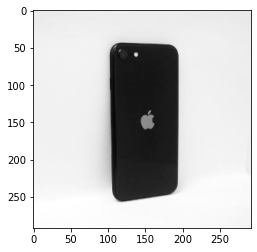

In [11]:
image = imread(train_app_list[0])
image = color.rgb2gray(image)
plt.imshow(image, cmap = 'gray')

In [12]:
import numpy as np

In [13]:
imsave('./tmp.png', np.round(image * 255).astype(np.uint8))

(292, 292)


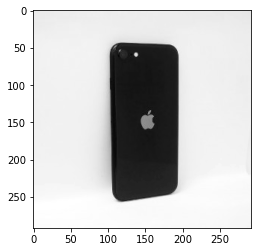

In [14]:
tmp = imread('tmp.png')
print(tmp.shape)
plt.imshow(tmp, cmap = 'gray')

In [15]:
train_app_list[0].split('/')[-1][:-4]

'app\\app (1)'

In [16]:
def img_load(img):
    img = color.rgb2gray(img)
    return img

In [17]:
from tqdm.notebook import tqdm

def convert_train_app():
    train_app_list = glob('./test/train_raw/app/*')
    for each in tqdm(train_app_list):
        img = imread(each)
        img_loaded = img_load(img)
        save_name = './test/train/' + each.split('/')[-1][:-4] + '.png'
        imsave(save_name, np.round(img_loaded * 255).astype(np.uint8))
convert_train_app()

  0%|          | 0/1200 [00:00<?, ?it/s]

<ipython-input-16-79aa9c0c631f>:2: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img = color.rgb2gray(img)
<ipython-input-17-ec92522fa5c9>:9: UserWarning: ./test/train/app\app (447).png is a low contrast image
  imsave(save_name, np.round(img_loaded * 255).astype(np.uint8))
<ipython-input-17-ec92522fa5c9>:9: UserWarning: ./test/train/app\app (488).png is a low contrast image
  imsave(save_name, np.round(img_loaded * 255).astype(np.uint8))


In [18]:
def convert_train_sam():
    train_sam_list = glob('./test/train_raw/sam/*')
    for each in tqdm(train_sam_list):
        img = imread(each)
        img_loaded = img_load(img)
        save_name = './test/train/' + each.split('/')[-1][:-4] + '.png'
        imsave(save_name, np.round(img_loaded * 255).astype(np.uint8))
convert_train_sam()

  0%|          | 0/1200 [00:00<?, ?it/s]

In [19]:
def convert_test_app():
    test_app_list = glob('./test/test_raw/app/*')
    for each in tqdm(test_app_list):
        img = imread(each)
        img_loaded = img_load(img)
        save_name = './test/test/' + each.split('/')[-1][:-4] + '.png'
        imsave(save_name, np.round(img_loaded * 255).astype(np.uint8))
convert_test_app()

  0%|          | 0/300 [00:00<?, ?it/s]

In [20]:
def convert_test_sam():
    test_sam_list = glob('./test/test_raw/sam/*')
    for each in tqdm(test_sam_list):
        img = imread(each)
        img_loaded = img_load(img)
        save_name = './test/test/' + each.split('/')[-1][:-4] + '.png'
        imsave(save_name, np.round(img_loaded * 255).astype(np.uint8))
convert_test_sam()

  0%|          | 0/300 [00:00<?, ?it/s]

<ipython-input-16-79aa9c0c631f>:2: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img = color.rgb2gray(img)
<ipython-input-20-8a2b4af0d34c>:7: UserWarning: ./test/test/sam\sam (1296).png is a low contrast image
  imsave(save_name, np.round(img_loaded * 255).astype(np.uint8))


In [21]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import keras

np.random.seed(42)

In [22]:
keras.__version__

'2.7.0'

In [23]:
train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                    './test/train'
                    , target_size = (292, 292)
                    , batch_size = 3
                    , class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                    './test/test'
                    , target_size = (292, 292)
                    , batch_size = 3
                    , class_mode = 'categorical')

Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [24]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3)
                , activation = 'relu'
                , input_shape = (292, 292, 3)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 290, 290, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 288, 288, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 144, 144, 64)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1327104)           0         
                                                                 
 dense (Dense)               (None, 128)               169869440 
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                        

In [26]:
model.compile(loss = 'categorical_crossentropy'
            , optimizer = 'adam'
            , metrics = ['accuracy'])

In [27]:
hist = model.fit_generator(
        train_generator
        , steps_per_epoch = 5
        , epochs = 20
        , validation_data = test_generator
        , validation_steps = 5)

<ipython-input-27-94221fc337d2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/20
5/5 [==============================] - 24s 4s/step - loss: 45.6709 - accuracy: 0.5333 - val_loss: 31.4962 - val_accuracy: 0.5333
Epoch 2/20
5/5 [==============================] - 11s 2s/step - loss: 16.6789 - accuracy: 0.4000 - val_loss: 3.2700 - val_accuracy: 0.6000
Epoch 3/20
5/5 [==============================] - 9s 2s/step - loss: 3.2185 - accuracy: 0.5333 - val_loss: 2.7319 - val_accuracy: 0.3333
Epoch 4/20
5/5 [==============================] - 10s 2s/step - loss: 1.7487 - accuracy: 0.5333 - val_loss: 1.2427 - val_accuracy: 0.5333
Epoch 5/20
5/5 [==============================] - 10s 2s/step - loss: 0.5729 - accuracy: 0.7333 - val_loss: 0.9664 - val_accuracy: 0.3333
Epoch 6/20
5/5 [==============================] - 9s 2s/step - loss: 0.6661 - accuracy: 0.5333 - val_loss: 0.5797 - val_accuracy: 0.7333
Epoch 7/20
5/5 [==============================] - 9s 2s/step - loss: 0.8777 - accuracy: 0.4000 - val_loss: 0.9483 - val_accuracy: 0.4667
Epoch 8/20
5/5 [==================

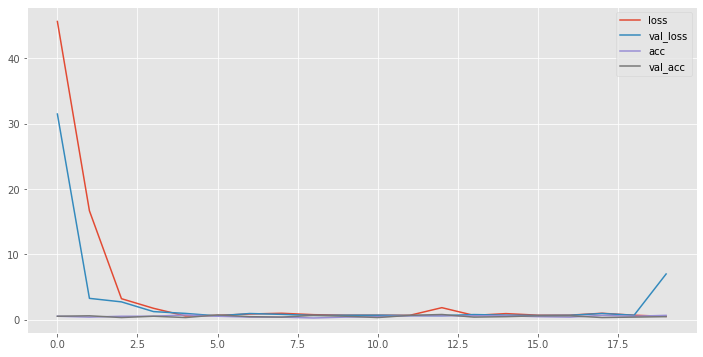

In [37]:
plt.figure(figsize = (12,6))
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.plot(hist.history['accuracy'], label = 'acc')
plt.plot(hist.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()

In [29]:
scores = model.evaluate(test_generator, steps = 5)
print('%s: %.2f%%' %(model.metrics_names[1], scores[1] * 100))

5/5 [==============================] - 1s 193ms/step - loss: 5.2451 - accuracy: 0.6000
accuracy: 60.00%


In [30]:
model.predict(test_generator)

array([[9.9999952e-01, 5.1042736e-07],
       [9.9999988e-01, 7.2820491e-08],
       [9.9999475e-01, 5.2040750e-06],
       ...,
       [9.9999070e-01, 9.2540422e-06],
       [1.0000000e+00, 3.0985952e-08],
       [9.9999988e-01, 1.7034050e-07]], dtype=float32)

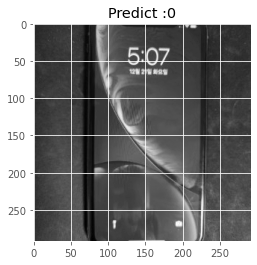

In [38]:
n = 1
def show_prediction_result(n):
    img = imread(test_generator.filepaths[n])
    pred = model.predict(np.expand_dims(color.gray2rgb(img), axis = 0))
    title = 'Predict :' + str(np.argmax(pred))
    plt.imshow(img/255, cmap = 'gray')
    plt.title(title)
    plt.show()
    
show_prediction_result(n)

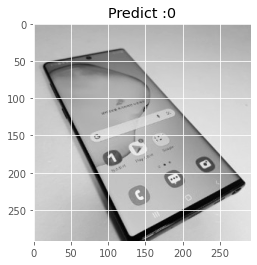

In [39]:
show_prediction_result(456)